Exemplo: Gastos de Consumo e Renda para 20 Famílias

In [1]:
import pandas as pd
import numpy as np

# Dados da tabela
data = {
    # 'Família': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gastos': [19.9, 31.2, 31.8, 12.1, 40.7, 6.1, 38.6, 25.5, 10.3, 38.8, 8, 33.1, 33.5, 13.1, 14.8, 21.6, 29.3, 25, 17.9, 19.8],
    'renda': [22.3, 32.3, 36.6, 12.1, 42.3, 6.2, 44.7, 26.1, 10.3, 40.2, 8.1, 34.5, 38, 14.1, 16.4, 24.1, 30.1, 28.3, 18.2, 20.1]
}

# Converter para um DataFrame do pandas
df = np.log(pd.DataFrame(data))

# # Exibir o DataFrame
print(df)


      gastos     renda
0   2.990720  3.104587
1   3.440418  3.475067
2   3.459466  3.600048
3   2.493205  2.493205
4   3.706228  3.744787
5   1.808289  1.824549
6   3.653252  3.799974
7   3.238678  3.261935
8   2.332144  2.332144
9   3.658420  3.693867
10  2.079442  2.091864
11  3.499533  3.540959
12  3.511545  3.637586
13  2.572612  2.646175
14  2.694627  2.797281
15  3.072693  3.182212
16  3.377588  3.404525
17  3.218876  3.342862
18  2.884801  2.901422
19  2.985682  3.000720


Obter a Regressão de Gastos e *Famílias*

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2744.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.95e-21
Time:                        19:20:14   Log-Likelihood:                 34.393
No. Observations:                  20   AIC:                            -64.79
Df Residuals:                      18   BIC:                            -62.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0757      0.057      1.318      0.2

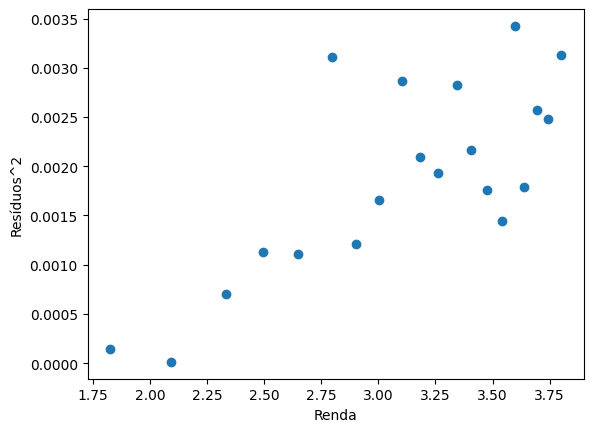

In [2]:
# Importar a biblioteca statsmodels.api como sm para realizar análises estatísticas
import statsmodels.api as sm

#Importar biblioteca matplotlib para plotagem de dados
import matplotlib.pyplot as plt

# Definir a variável alvo (target) como 'gastos' do DataFrame df
target = df.gastos

# Definir as características (features) como todas as colunas do DataFrame df, exceto 'gastos'
features = df.drop("gastos", axis=1)

# Adicionar uma constante (intercept) às características. Isso é necessário para a regressão linear.
features = sm.add_constant(features)

# Ajustar um modelo de regressão linear ordinária (OLS) com a variável alvo e as características
fit = sm.OLS(target, features).fit()

# Imprimir um resumo estatístico do modelo ajustado
print(fit.summary())

plt.scatter(df.renda, fit.resid ** 2)
plt.ylabel('Resíduos^2')
plt.xlabel('Renda')
plt.show()
plt.show()

**DETECÇÃO DE HETEROCEDASTICIDADE**

Teste de Breusch-Pagan

In [3]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

# Realize o teste de Breusch-Pagan
bp_test = het_breuschpagan(fit.resid, features)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 11.607382986660967), ('LM-Test p-value', 0.0006569052216384828), ('F-Statistic', 24.89484429324301), ('F-Test p-value', 9.498136003581186e-05)]


Teste de White

In [4]:
from statsmodels.stats.diagnostic import het_white

# Realize o teste de White
white_test = het_white(fit.resid, features)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, white_test))

[('LM Statistic', 12.147390995862759), ('LM-Test p-value', 0.002302648036866389), ('F-Statistic', 13.148855801993125), ('F-Test p-value', 0.0003538863512695298)]


Teste de Glejser

In [7]:
#Teste de Glejser

glejser1 = sm.OLS(fit.resid.abs(), features).fit()
#print(glejser1.summary())

glejser2 = sm.OLS(fit.resid.abs(), 1/features).fit()
#print(glejser2.summary())

glejser3 = sm.OLS(fit.resid.abs(), features ** 0.5).fit()
#print(glejser3.summary())

glejser4 = sm.OLS(fit.resid.abs(), features ** -0.5).fit()
#print(glejser4.summary())


**Solução para heterocedasticidade**

Regressão de sigma^2 ~ const + beta * 1/renda

In [8]:
# Calcula o inverso da variável 'renda' para realizar a transformação dos dados
features_h = df.renda

# Adiciona uma constante (intercept) à variável transformada para o primeiro estágio da regressão em dois estágios
features_h = sm.add_constant(features_h)

# Ajusta um modelo de regressão linear para os resíduos ao quadrado em relação à variável transformada
fit_h = sm.OLS(fit.resid ** 2, features_h).fit()

# Imprime um resumo estatístico do modelo de regressão linear do primeiro estágio
print(fit_h.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     24.89
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           9.50e-05
Time:                        19:21:16   Log-Likelihood:                 119.49
No. Observations:                  20   AIC:                            -235.0
Df Residuals:                      18   BIC:                            -233.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.001     -2.604      0.0

Testar a hetereocedasticidade do residuo da regressão sigma^2 ~ const + beta * 1/renda

In [9]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

# Realize o teste de White
white_test = het_white(fit_h.resid, features_h)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, white_test))

# Realize o teste de Breusch-Pagan
bp_test = het_breuschpagan(fit_h.resid, features_h)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 1.096680596434525), ('LM-Test p-value', 0.577908170084988), ('F-Statistic', 0.49312953300335316), ('F-Test p-value', 0.6191824715823008)]
[('LM Statistic', 0.06568414112202214), ('LM-Test p-value', 0.797727555440312), ('F-Statistic', 0.05931051502175462), ('F-Test p-value', 0.8103429952978715)]


Mostrar o gráfico de residuos da regressão u^2 = (σ^2 - (const + β * 1/renda))^2 em 1/renda

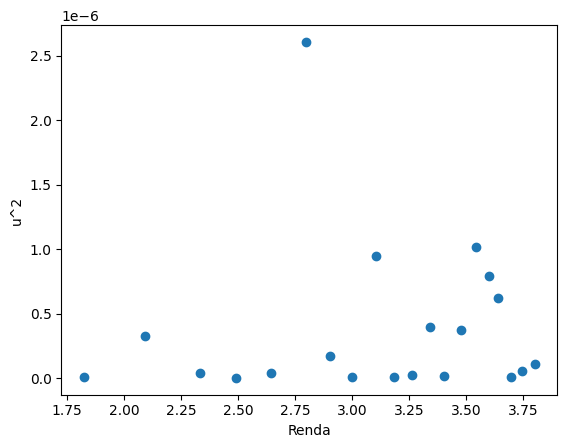

In [10]:
import matplotlib.pyplot as plt
plt.scatter(features_h.renda, fit_h.resid ** 2)
plt.ylabel('u^2')
plt.xlabel('Renda')
plt.show()


In [11]:
e_i = fit_h.fittedvalues ** 0.5

In [12]:
reg_2 = pd.DataFrame({'yi_ei': df.gastos/e_i,
                      'one_ei': 1/e_i,
                      'xi_ei': df.renda/e_i})


X = reg_2.drop("yi_ei", axis = 1)
y = reg_2.yi_ei
print(sm.OLS(y, X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  yi_ei   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.275e+04
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                    1.22e-34
Time:                        19:21:42   Log-Likelihood:                         -27.881
No. Observations:                  20   AIC:                                      59.76
Df Residuals:                      18   BIC:                                      61.75
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------